<a href="https://colab.research.google.com/github/VictorCoelho957/Busca-A-estrela/blob/main/BuscaAEstrelaP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilização do Algoritmo  de busca A* para encontrar o melhor caminho

#Discentes:

* Felipe Pereira Barbosa;

* Kleiton Linneker Barbosa Pinheiro;

*  Victor Coelho da Silva


# Definição do problema:

Vamos abordar a situação do nosso colega Victor Coelho, residente no município de Paço do Lumiar, especificamente no bairro Conjunto Habitacional Paranã. Nesta situação, temos como objetivo auxiliá-lo a encontrar a melhor rota de ônibus para chegar à UFMA diariamente. Os possíveis trajetos que podem ser considerados incluem:


*   Paranã ▶ Terminal de Integração Cohab/Cohatrac ▶ Terminal de Integração da Praia Grande ▶ UFMA;
*   Paranã  ▶ Terminal de Integração da Cohama ▶ Terminal de Integração da Praia Grande ▶ UFMA;
*   Paranã  ▶ CEST-Anil ▶ CEPRAMA ▶ UFMA.


#Distância em linha reta:

Na Figura abaixo representa-se a distancia em linha reta entre a  casa do Victor e a UFMA.
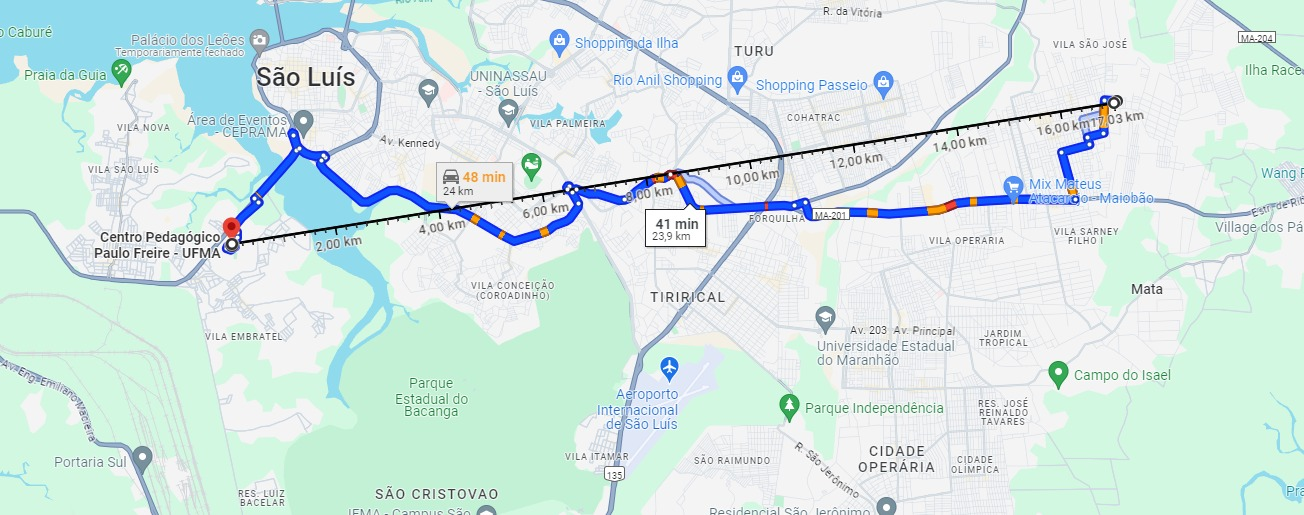











In [ ]:
#importações
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [ ]:
# Criar o grafo
G = nx.Graph()

In [ ]:
# Adicionar nós e arestas
G.add_nodes_from(["Paranã", "Terminal da Cohab", "Terminal da Cohama", "Terminal da Praia Grande", "Cest Anil", "CEPRAMA", "UFMA"])
G.add_edges_from([("Paranã", "Terminal da Cohab", {"weight": 9.8}),
                  ("Paranã", "Cest Anil", {"weight": 12.2}),
                  ("Paranã", "Terminal da Cohama", {"weight": 14.4}),
                  ("Terminal da Cohama", "Terminal da Praia Grande", {"weight": 11.1}),
                  ("Terminal da Cohab", "Terminal da Praia Grande", {"weight": 14.7}),
                  ("Cest Anil", "CEPRAMA", {"weight": 9.8}),
                  ("Terminal da Praia Grande", "UFMA", {"weight":3}),
                  ("CEPRAMA", "UFMA", {"weight": 6})])

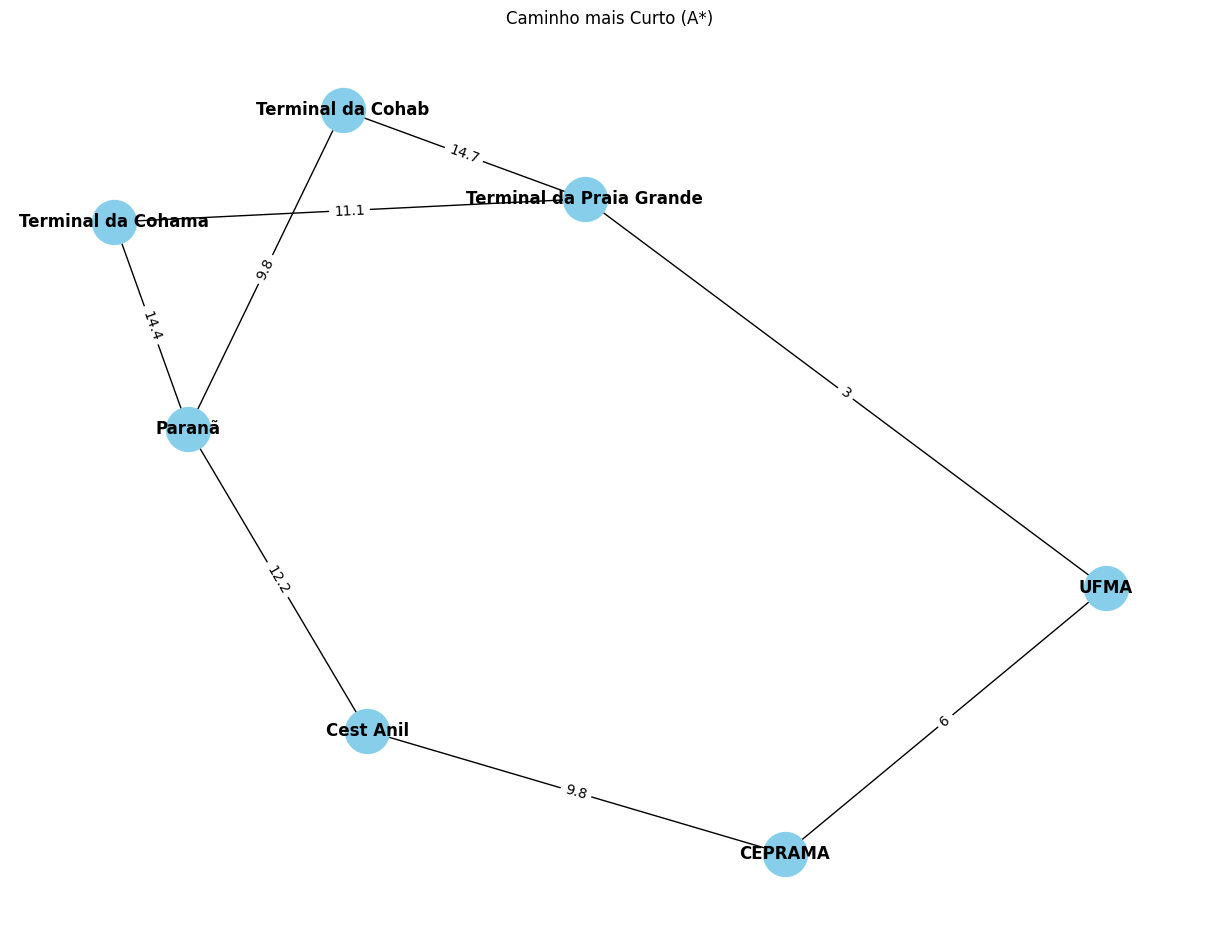

In [ ]:
# Desenhar o grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 9))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Caminho mais Curto (A*)")
plt.show()

In [ ]:
# Definição da heuristica, distancia em linha reta:
def heuristica(no, fim):
    heuristica_values = {"Paranã": 0, "UFMA": 22.3}
    return heuristica_values.get(no, 0)

In [ ]:
# Implementação da função para o Algoritmo A*
def A_Estrela(grafo, inicio, fim):
    fronteira = [(0, inicio)] # Nó, fila de prioridade
    visitado = {} # P/ guardar o caminho visitado
    custo_acumulado = {inicio: 0}

    # Enquanto houver elementos na fila, executa o código
    while fronteira:
        custo_atual, no_atual = heapq.heappop(fronteira) # Função usada para retirar o elemento de menor prioridade na fila
        if no_atual == fim:
            break
        for i_no in grafo.neighbors(no_atual):
            new_custo = custo_acumulado[no_atual] + grafo[no_atual][i_no]['weight']
            if i_no not in custo_acumulado or new_custo < custo_acumulado[i_no]:
                custo_acumulado[i_no] = new_custo
                prioridade = new_custo + heuristica(i_no, fim)
                heapq.heappush(fronteira, (prioridade, i_no))
                visitado[i_no] = no_atual

    path = []
    no_atual = fim
    while no_atual != inicio:
        path.append(no_atual)
        no_atual = visitado[no_atual]
    path.append(inicio)
    path.reverse()
    return path, custo_acumulado[fim]


Caminho mais curto: ['Paranã', 'Terminal da Cohab', 'Terminal da Praia Grande', 'UFMA']
Custo total: 27.5


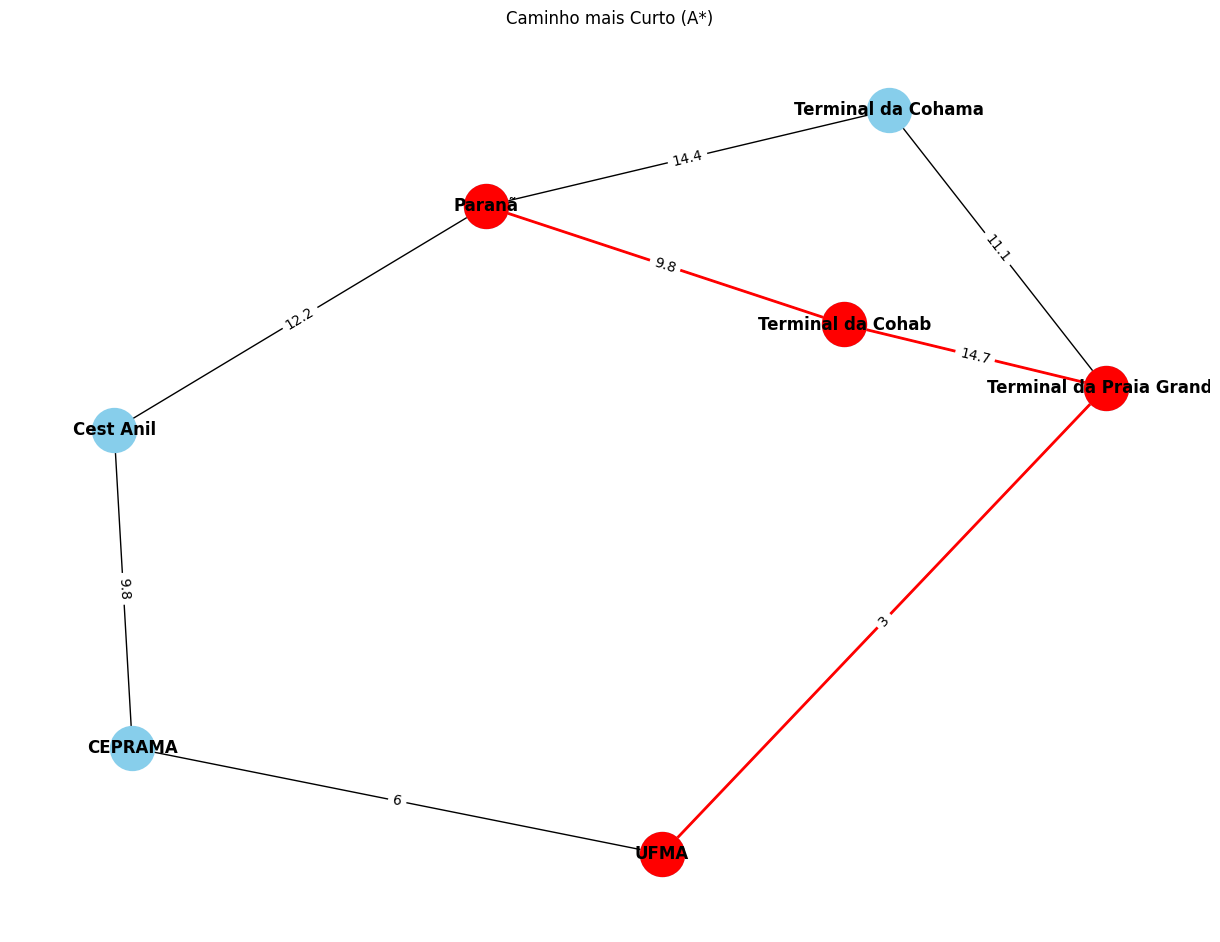

In [ ]:
# Desenhar o grafo
no_inicio = "Paranã"
no_fim = "UFMA"
caminho_mais_curto, custo_total = A_Estrela(G, no_inicio, no_fim)
print("Caminho mais curto:", caminho_mais_curto)
print("Custo total:", custo_total)
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 9))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_nodes(G, pos, nodelist=caminho_mais_curto, node_color='red', node_size=1000)
nx.draw_networkx_edges(G, pos, edgelist=[(caminho_mais_curto[i], caminho_mais_curto[i+1]) for i in range(len(caminho_mais_curto)-1)], edge_color='red', width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Caminho mais Curto (A*)")
plt.show()

